# Text Generation
In this notebook, we will generate a poem from text we have been given.

## Imports

In [145]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional

## Data preprocessing

In [146]:
data = []

with open('./irish-poem.txt','r') as file:
    for line in file.readlines():
        data.append(line.lower().split('\n')[0])

print(len(data))
print(data)

71
['in the town of athy one jeremy lanigan', "battered away 'til he hadn't a pound.", 'his father died and made him a man again', 'left him a farm and ten acres of ground.', 'he gave a grand party for friends and relations', "who didn't forget him when come to the wall,", "and if you'll but listen i'll make your eyes glisten", "of the rows and the ructions of lanigan's ball.", '', 'myself to be sure got free invitation,', 'for all the nice girls and boys i might ask,', 'and just in a minute both friends and relations', "were dancing 'round merry as bees 'round a cask.", "judy o'daly, that nice little milliner,", 'she tipped me a wink for to give her a call,', 'and i soon arrived with peggy mcgilligan', "just in time for lanigan's ball.", '', 'there were lashings of punch and wine for the ladies,', 'potatoes and cakes; there was bacon and tea,', "there were the nolans, dolans, o'gradys", 'courting the girls and dancing away.', "songs they went 'round as plenty as water,", "the harp tha

Tokenizer Hyperparameters

In [147]:
# OOV_TOK = '<OOV>'
# VOCAB_SIZE = 8192
PAD = 'pre'
# TRUNC = 'post'
# SNTNC_MAX_LEN = 16

In [148]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
VOCAB_SIZE = len(tokenizer.word_index) + 1
print(VOCAB_SIZE)

263


Generating Input sequences

In [149]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [150]:
input_sequences = []
seqs = tokenizer.texts_to_sequences(data)

SNTNC_MAX_LEN = 0

for sequ in seqs:
    for i in range(len(sequ)):
        input_sequences.append(sequ[:i+1])
    SNTNC_MAX_LEN = max(SNTNC_MAX_LEN, len(sequ))

pad_seqs = pad_sequences(seqs, maxlen=SNTNC_MAX_LEN, padding=PAD)
train_data = pad_seqs[:,:-1]
train_labels = pad_seqs[:,-1]

print(train_data.shape)
print(train_labels.shape)


(71, 10)
(71,)


Categorical 

In [151]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=VOCAB_SIZE)
print(train_labels.shape)

(71, 263)


## Model Generation

In [152]:
model = Sequential([
    Embedding(VOCAB_SIZE, 64, input_length=SNTNC_MAX_LEN-1),
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dense(VOCAB_SIZE, activation='softmax')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 10, 64)            16832     
                                                                 
 bidirectional_12 (Bidirect  (None, 64)                24832     
 ional)                                                          
                                                                 
 dense_24 (Dense)            (None, 16)                1040      
                                                                 
 dense_25 (Dense)            (None, 263)               4471      
                                                                 
Total params: 47175 (184.28 KB)
Trainable params: 47175 (184.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [153]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Model Training

In [154]:
data_hist = model.fit(train_data, train_labels, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 5.5726 - accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 5.5639 - accuracy: 0.0704
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 5.5557 - accuracy: 0.0423
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 5.5467 - accuracy: 0.0423
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 5.5353 - accuracy: 0.0423
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 5.5218 - accuracy: 0.0423
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 5.5031 - accuracy: 0.0423
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 5.4787 - accuracy: 0.0423
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 5.4426 - accuracy: 0.0563
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 5.3914 - accuracy: 0.0704
Epoch 11/100
3/3 [=======

## Plotting Metrics

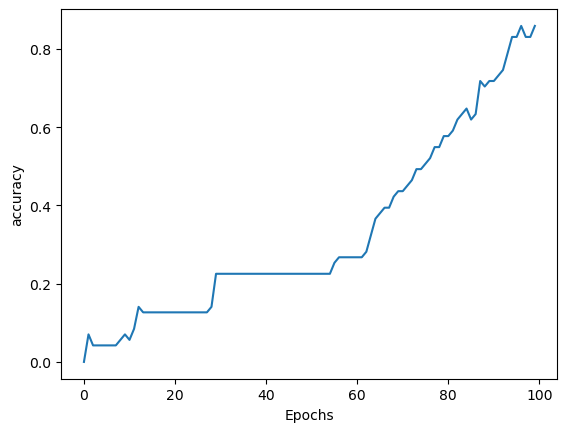

In [155]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(data_hist, 'accuracy')

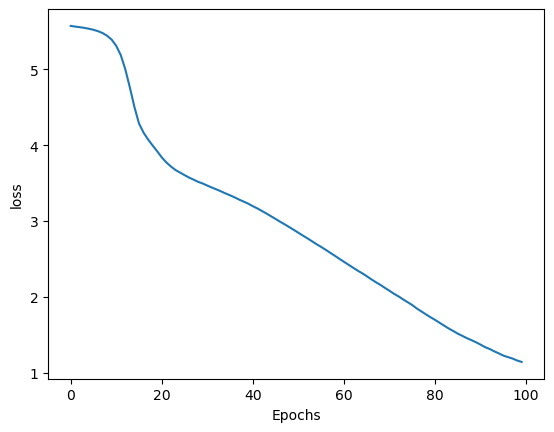

In [156]:
plot_graphs(data_hist, 'loss')

## Generate text

In [157]:
seed_text = 'Rabbit went to dublin fair'
print([seed_text.lower()])

gen_seq = tokenizer.texts_to_sequences([seed_text.lower()])
pad_gen_seq = pad_sequences(gen_seq, padding=PAD, maxlen=SNTNC_MAX_LEN-1)

print(gen_seq)
print(pad_gen_seq)

['rabbit went to dublin fair']
[[134, 13, 59, 229]]
[[  0   0   0   0   0   0 134  13  59 229]]


In [158]:
outputs = model.predict(pad_gen_seq)
output_label = np.argmax(outputs, axis=1)
# print(output_label[0])
# print(tokenizer.index_word[output_label[0]])

1/1 [==============================] - 1s 599ms/step


Loop

In [162]:
seed_text = 'Laurence went to Dublin'
for _ in range(10):
    gen_seq = tokenizer.texts_to_sequences([seed_text.lower()])
    pad_gen_seq = pad_sequences(gen_seq, padding=PAD, maxlen=SNTNC_MAX_LEN-1)
    outputs = model.predict(pad_gen_seq)
    output_label = np.argmax(outputs, axis=1)
    if output_label[0] != 0:
        output_word = tokenizer.index_word[output_label[0]]
        seed_text += f' {output_word}'

print(seed_text)

1/1 [==============================] - 0s 10ms/step
Laurence went to Dublin


Loop top random 4

In [163]:
seed_text = 'Laurence went to Dublin'

for _ in range(10):
    gen_seq = tokenizer.texts_to_sequences([seed_text.lower()])
    pad_gen_seq = pad_sequences(gen_seq, padding=PAD, maxlen=SNTNC_MAX_LEN-1)
    outputs = model.predict(pad_gen_seq)
    output_label = np.argsort(outputs, axis=1)[0]
    choice = np.random.choice([-1,-2,-3,-4])

    if output_label[choice] != 0:
        output_word = tokenizer.index_word[output_label[choice]]
        seed_text += f' {output_word}'

print(seed_text)

1/1 [==============================] - 0s 9ms/step
Laurence went to Dublin ball ball relations hullabaloo dublin dublin relations ask


Choosing top last 3 options

In [9]:
import numpy as np

for i in range(10):
    print(np.random.choice([-1,-2,-3]), np.random.randint(-3,0))

-3 -2
-2 -3
-1 -2
-2 -2
-1 -1
-3 -1
-1 -1
-1 -1
-2 -2
-2 -3


In [22]:
arr = list(range(10))
print(arr)
print(arr[-3:])

for i in range(10):
    print(np.random.choice(arr[-3:]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[7, 8, 9]
7
8
8
8
7
7
9
9
8
7
